# AnimFromData v2.0

### IMPOSTAZIONI GENERALI
- **NEWS**            : modificare label_names e colors, in questa versione l'animazione prende tutti i file txt che iniziano con la stringa 'planet' che trova nella cartella
- **N.B.**            : modificare argomento di 'filename.startswith' per selezionare file txt di input per l'animazione diversi
- **HOW TO**          : tenere nella cartella corrente solo i file .txt utili alla simulazione corrente per non creare sovrapposizione

In [6]:
import numpy as np
import os

# Directory corrente
directory = "./"  

# Lista vuote
file_list = []
all_x = []
all_y = []

# Itera su tutti i file nella directory
for filename in os.listdir(directory):
    if filename.startswith("planet") and filename.endswith("rk4_6fpy_50y.txt"):
        file_list.append(filename)
        data = np.loadtxt(filename)
        print(f"Valori del file {filename}:")
        x_max = np.max(data[:, 0])  # Massimo prima colonna
        x_min = np.min(data[:, 0])  # Minimo prima colonna
        all_x.append(x_max)
        all_x.append(x_min)
        y_max = np.max(data[:, 1])  # Massimo seconda colonna
        y_min = np.min(data[:, 1])  # Minimo seconda colonna
        all_y.append(y_max)
        all_y.append(y_min)
        print(f"x_max = {x_max:.3e}, x_min = {x_min:.3e}")
        print(f"y_max = {y_max:.3e}, y_min = {y_min:.3e}")
        print("\n")

margin = 0.20

# Massimi e minimi per impostazione del grafico
print(f"Max x coordinate: {max(all_x):.3e}")
print(f"Min x coordinate: {min(all_x):.3e}")
print(f"Max y coordinate: {max(all_y):.3e}")
print(f"Min y coordinate: {min(all_y):.3e}")

print(file_list)

Valori del file planet_earth_v15_rk4_6fpy_50y.txt:
x_max = 3.990e+14, x_min = -1.490e+11
y_max = 1.490e+11, y_min = -3.900e+14


Valori del file planet_jupiter_v15_rk4_6fpy_50y.txt:
x_max = 7.790e+11, x_min = -7.780e+11
y_max = 7.790e+11, y_min = -7.790e+11


Valori del file planet_mars_v15_rk4_6fpy_50y.txt:
x_max = 2.270e+11, x_min = -2.280e+11
y_max = 2.280e+11, y_min = -2.280e+11


Valori del file planet_mercury_v15_rk4_6fpy_50y.txt:
x_max = 3.680e+14, x_min = 3.680e+09
y_max = 7.350e+10, y_min = -2.110e+14


Valori del file planet_neptune_v15_rk4_6fpy_50y.txt:
x_max = 4.500e+12, x_min = -4.490e+12
y_max = 4.490e+12, y_min = -4.490e+12


Valori del file planet_saturn_v15_rk4_6fpy_50y.txt:
x_max = 1.430e+12, x_min = -1.440e+12
y_max = 1.440e+12, y_min = -1.440e+12


Valori del file planet_uranus_v15_rk4_6fpy_50y.txt:
x_max = 2.870e+12, x_min = -2.870e+12
y_max = 2.870e+12, y_min = -2.870e+12


Valori del file planet_venus_v15_rk4_6fpy_50y.txt:
x_max = 2.430e+15, x_min = -9.480e+10
y_

n_frames: 3000


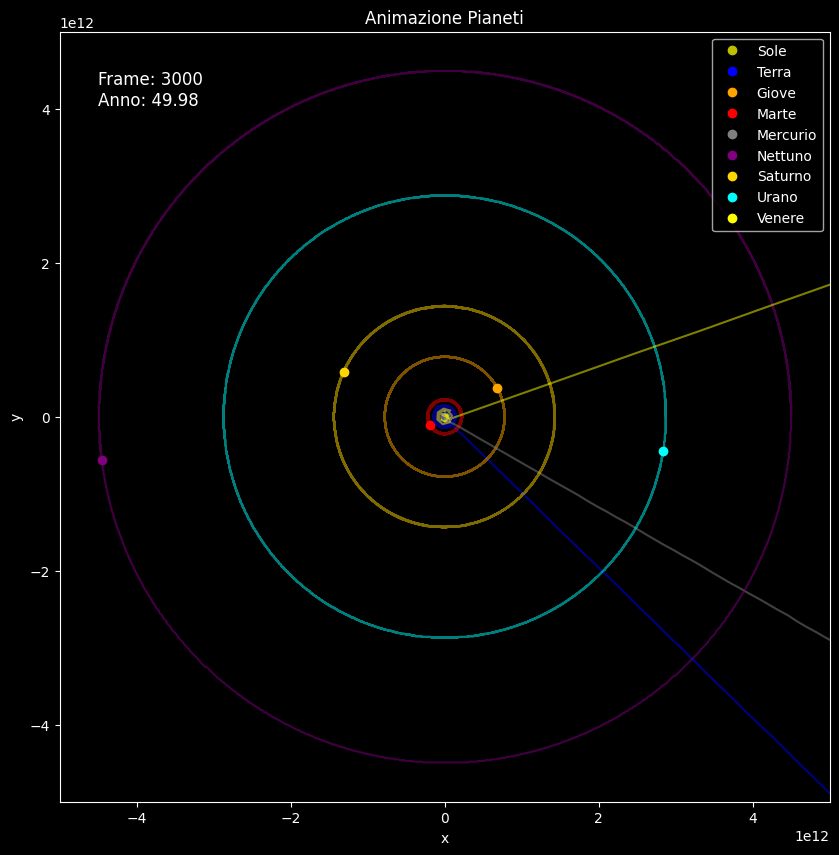

In [7]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Caricamento dei dati dai file txt ------------MODIFICA SELEZIONE NOMI PIANETI INNER/OUTER--------------
file_names = file_list
label_names = [
               "Terra", 
               "Giove", 
               "Marte",
               "Mercurio",
               "Nettuno", 
               "Saturno", 
               "Urano", 
               "Venere"]                       # non cambiare l'ordine, corrisponde a estrazione dati sopra
colors = ['blue', 'orange', 'red', 'gray', 
          'purple', 'gold', 'cyan','yellow'
           ]  

# -------------------------------------------------MODIFICA SELEZIONE NOMI PIANETI INNER/OUTER--------------

data = [np.loadtxt(file_name) for file_name in file_names] # lista di 4 array ognuno con contenuto dei file txt

# Controllo che i file abbiano lo stesso numero di righe
n_frames = min(len(d) for d in data)
print("n_frames:", n_frames)

# Impostazione del grafico
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10))
#ax.set_xlim(min(all_x) + margin * min(all_x), max(all_x) + margin * max(all_x))  # disabilita se pianeta diverge
#ax.set_ylim(min(all_y) + margin * min(all_y), max(all_y) + margin * max(all_y))  # disabilita se pianeta diverge
ax.set_xlim(-5e12, 5e12)
ax.set_ylim(-5e12, 5e12)
ax.set_aspect('equal')
ax.set_title("Animazione Pianeti")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Aggiunta del Sole al centro
ax.plot(0, 0, "yo", label="Sole")

# Creazione dei punti grafici per ciascun pianeta
planets = [ax.plot([], [], "o", color=color, label=name)[0] for color,name in zip(colors,label_names)]

# Creazione delle traiettorie
trajectories = [ax.plot([], [], "-", color=color, alpha=0.5)[0] for color in colors]

# Testo dinamico per il numero di frame
frame_text = ax.text(0.05, 0.95, "", transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Aggiunta della legenda
ax.legend(loc="upper right")

# Memorizzazione dei punti visitati
trajectory_data = [([], []) for _ in range(len(planets))]  # Una lista di tuple per ogni pianeta

# Funzione di inizializzazione
def init():
    for planet,trajectory in zip(planets,trajectories):
        planet.set_data([], [])
        trajectory.set_data([], [])
    frame_text.set_text("")
    return planets + trajectories + [frame_text]

# Funzione di aggiornamento per ogni frame
def update(frame):
    for i, (planet, trajectory) in enumerate(zip(planets,trajectories)):
        x, y = data[i][frame]
        planet.set_data([x], [y])  # Aggiorna le coordinate
        # Aggiorna la traiettoria
        trajectory_data[i][0].append(x)
        trajectory_data[i][1].append(y)
        trajectory.set_data(trajectory_data[i][0], trajectory_data[i][1])
    
    current_year = frame / (n_frames / 50)  # Assuming 50 years of data
    frame_text.set_text(f"Frame: {frame + 1}\nAnno: {current_year:.2f}")
    
    print(f"Frame: {frame + 1}/{n_frames}", end="\r") # debug
     
    return planets + [frame_text]

# Creazione dell'animazione
ani = FuncAnimation(fig, update, frames=n_frames, init_func=init, blit=True, interval=50)

# Salvataggio
ani.save("AnimFromData_v15_rk4_all_6fpy_50y_ModDeltaT.mp4", fps=30)  
plt.show()  